# Agentpy Example

## Config

In [ ]:
#! pip install agentpy matplotlib seaborn IPython

## Source code

#### Imports

In [89]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import random


#### Model definition

In [95]:
MOVES = [(1,0),(0,1),(-1,0),(0,-1)]

class RoomModel(ap.Model):

    def setup(self):

        self.robot = ap.AgentList(self,1)
        self.trash = ap.AgentList(self,10)

        self.room = ap.Grid(self, [50,50], track_empty = True)
        self.room.add_agents(self.robot,[(1,1)])
        self.room.add_agents(self.trash,random = True)

        # Initiate a dynamic variable for all trees
        # Condition 0: robot, 1: trash, 2: clean
        self.robot.type_agent = 0
        self.trash.type_agent = 1

    def step(self):

        # Select robot
        robots = self.robot
        room = self.trash.select(self.trash.type_agent == 1)

        for robot in robots:
            for neighbor in self.room.neighbors(robot):
                if neighbor.type_agent == 1:
                    neighbor.type_agent = 2
                    break
            else:
                self.room.move_by(robot, random.choice(MOVES))

        trash_pending = self.trash.select(self.trash.type_agent == 1)

        # Stop simulation if no fire is left
        if len(trash_pending) == 0:
            self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        cleaned_tiles = len(self.trash.select(self.trash.type_agent == 2))
        self.report('Percentage of cleaned tiles',
                    cleaned_tiles / len(self.trash))

In [96]:
parameters = {
    'density':0.8,
    'N':50,
    'M':100,
    'steps':100
}

#### Create single-run animation with custom colors

KeyError: 'density'

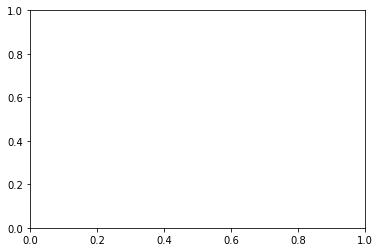

In [97]:
def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('type_agent')
    color_dict = {0:'#7FC97F', 1:'#d62c2c', 2:'#e5e5e5', None:'#d5e5d5'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a forest fire\n"
                 f"Time-step: {model.t}, Trash left: "
                 f"{len(model.trash.select(model.trash.type_agent == 1))}")

fig, ax = plt.subplots()
model = RoomModel({'steps':100})
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))